# Autoencoders

In [1]:
%matplotlib inline

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tf_utils import FullyConnectedLayer
from vis_utils import tilePatches

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
class FeedForwardNet():   
    n_layer = None
    layers = None
    def __init__(self):
        self.n_layer = 0
        self.layers = []
    
    def addLayer(self, new_layer):
        self.layers += [new_layer]
        self.n_layer += 1
 
    def forward(self, X):
        Xin = X
        for layer in self.layers:
            Xin = layer.forward(Xin)
        return Xin

## Simple autoencoder
In this case the encoder and decoder newtworks are single layers with independent parameters.

In [3]:
encoder_net = FeedForwardNet()
encoder_net.addLayer(FullyConnectedLayer((784, 128), 'sigmoid'))

decoder_net = FeedForwardNet()
decoder_net.addLayer(FullyConnectedLayer((128, 784), 'identity'))

# Data handler included in TF examples (downloads data)
mnist = input_data.read_data_sets('../data/mnist', one_hot=True)
x = tf.placeholder(tf.float32, [None, 784])
x_enc = encoder_net.forward(x)
y_dec = decoder_net.forward(x_enc)
x_dec = tf.nn.sigmoid(y_dec)

Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz


In [21]:
rec_cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=x, logits=y_dec))
train_step = tf.train.MomentumOptimizer(0.5, 0.9).minimize(rec_cost)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [22]:
for i in range(20000):
    batch_xs, _ = mnist.train.next_batch(100)
    ## display training accuracy 
    if i%2000 == 0:
        train_cost = rec_cost.eval(feed_dict={
        x:batch_xs})
        print("step %d, training cost %g"%(i, train_cost))
    ## 
    sess.run(train_step, feed_dict={x: batch_xs})

step 0, training cost 0.766104
step 2000, training cost 0.146735
step 4000, training cost 0.131907
step 6000, training cost 0.124813
step 8000, training cost 0.112641
step 10000, training cost 0.11004
step 12000, training cost 0.112541
step 14000, training cost 0.107154
step 16000, training cost 0.108928
step 18000, training cost 0.098759


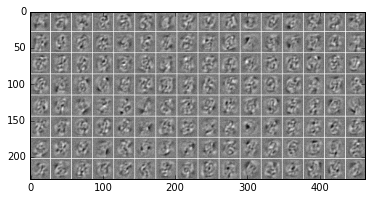

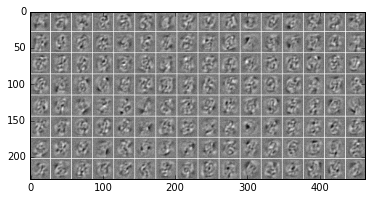

In [23]:
# visualize the encoder filters
W_enc = encoder_net.layers[0].params['W'].eval()
enc_filters = tilePatches(np.reshape(W_enc, [28, 28, -1]), ncol=16)
plt.imshow(enc_filters[:,:,0], cmap='gray')
plt.show()
# visualize the decoder filters
W_dec = decoder_net.layers[0].params['W'].eval()
dec_filters = tilePatches(np.reshape(W_dec.transpose(), [28, 28, -1]), ncol=16)
plt.imshow(dec_filters[:,:,0], cmap='gray')
plt.show()

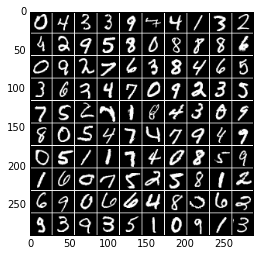

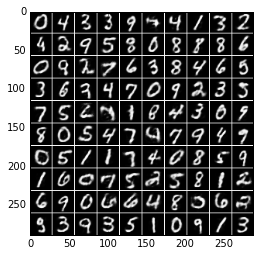

In [24]:
# visualize reconstructions
batch_rec = sess.run(x_dec, feed_dict={x:batch_xs})
tiled_batch_xs = tilePatches(np.reshape(batch_xs.transpose(), [28, 28, -1]), ncol=10)
tiled_batch_rec = tilePatches(np.reshape(batch_rec.transpose(), [28, 28, -1]), ncol=10)
plt.imshow(tiled_batch_xs[:,:,0], cmap='gray')
plt.show()
plt.imshow(tiled_batch_rec[:,:,0], cmap='gray')
plt.show()

# Tied Weights

In [19]:
encoder_net = FeedForwardNet()
encoder_net.addLayer(FullyConnectedLayer((784, 128), 'sigmoid'))

decoder_net = FeedForwardNet()
decoder_net.addLayer(FullyConnectedLayer((128, 784), 'identity', shared_W=tf.transpose(encoder_net.layers[0].params['W'])))


mnist = input_data.read_data_sets('../data/mnist', one_hot=True)
x = tf.placeholder(tf.float32, [None, 784])
x_enc = encoder_net.forward(x)
y_dec = decoder_net.forward(x_enc)
x_dec = tf.nn.sigmoid(y_dec)

rec_cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=x, logits=y_dec))
train_step = tf.train.MomentumOptimizer(0.5, 0.9).minimize(rec_cost)

tf.global_variables_initializer().run()


Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz


In [20]:
for i in range(20000):
    batch_xs, _ = mnist.train.next_batch(100)
    ## display training accuracy 
    if i%2000 == 0:
        train_cost = rec_cost.eval(feed_dict={x:batch_xs})
        print("step %d, training cost %g"%(i, train_cost))
    ## 
    sess.run(train_step, feed_dict={x: batch_xs})

step 0, training cost 0.751103
step 2000, training cost 0.142532
step 4000, training cost 0.132098
step 6000, training cost 0.11792
step 8000, training cost 0.115593
step 10000, training cost 0.109261
step 12000, training cost 0.120401
step 14000, training cost 0.114095
step 16000, training cost 0.111839
step 18000, training cost 0.103495


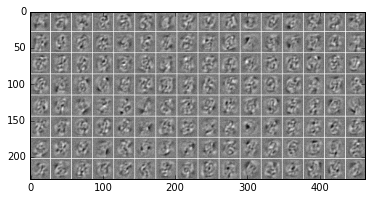

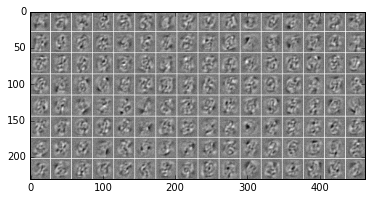

In [25]:
# visualize the encoder filters
W_enc = encoder_net.layers[0].params['W'].eval()
enc_filters = tilePatches(np.reshape(W_enc, [28, 28, -1]), ncol=16)
plt.imshow(enc_filters[:,:,0], cmap='gray')
plt.show()
# visualize the decoder filters
W_dec = decoder_net.layers[0].params['W'].eval()
dec_filters = tilePatches(np.reshape(W_dec.transpose(), [28, 28, -1]), ncol=16)
plt.imshow(dec_filters[:,:,0], cmap='gray')
plt.show()

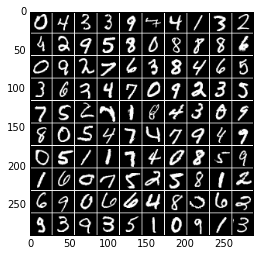

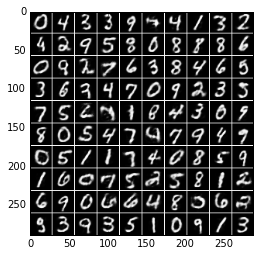

In [26]:
# visualize reconstructions
batch_rec = sess.run(x_dec, feed_dict={x:batch_xs})
tiled_batch_xs = tilePatches(np.reshape(batch_xs.transpose(), [28, 28, -1]), ncol=10)
tiled_batch_rec = tilePatches(np.reshape(batch_rec.transpose(), [28, 28, -1]), ncol=10)
plt.imshow(tiled_batch_xs[:,:,0], cmap='gray')
plt.show()
plt.imshow(tiled_batch_rec[:,:,0], cmap='gray')
plt.show()